# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?APPID="+weather_api_key
response = requests.get(url +"&q=Miami").json()
print(response)

{'coord': {'lon': -80.1937, 'lat': 25.7743}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 302.16, 'feels_like': 306.87, 'temp_min': 300.15, 'temp_max': 303.17, 'pressure': 1015, 'humidity': 75}, 'visibility': 10000, 'wind': {'speed': 1.79, 'deg': 148, 'gust': 3.58}, 'clouds': {'all': 75}, 'dt': 1627342681, 'sys': {'type': 2, 'id': 2009435, 'country': 'US', 'sunrise': 1627296249, 'sunset': 1627344610}, 'timezone': -14400, 'id': 4164138, 'name': 'Miami', 'cod': 200}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:

# set up lists to hold reponse info
city_name = []
lat = []
lon =[]
max_temp = []
humidity = []
wind_speed  = []
cloudiness = []
wind_speed =[]
country =[]
city_id = []
date = []
units = "imperial"
set_count = 1
record_count = 1
# Loop through the list of cities and perform a request for data on each



In [5]:
for i, city in enumerate(cities):
    if (i%50 == 0 and i>=50):
        set_count+=1
        record_count = 0
        
    query_url = f"{url}&units={units}&q={city}"
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count += 1

    try:
        response = requests.get(query_url).json()
        
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        city_id.append(response["id"])
        date.append(response["dt"])
        time.sleep(0.1)
    except KeyError:
        print("City not found. Skipping...")
        pass
    

Processing Record 1 of Set 1 | sobolevo
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | baykit
Processing Record 5 of Set 1 | saskylakh
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | havre-saint-pierre
Processing Record 9 of Set 1 | chokurdakh
Processing Record 10 of Set 1 | broome
Processing Record 11 of Set 1 | taree
Processing Record 12 of Set 1 | vanavara
Processing Record 13 of Set 1 | port lincoln
Processing Record 14 of Set 1 | pisco
Processing Record 15 of Set 1 | gorom-gorom
Processing Record 16 of Set 1 | pimentel
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | ancud
Processing Record 20 of Set 1 | laguna
Processing Record 21 of Set 1 | sindor
Processing Record 22 of Set 1 | baruun-urt
Processing Record 23 of Set 1 | ushuaia
Processing Record 24 of Set 1 | bluff
Processing Record 25 of Set 

Processing Record 38 of Set 4 | bonavista
Processing Record 39 of Set 4 | ostrovnoy
Processing Record 40 of Set 4 | saleaula
City not found. Skipping...
Processing Record 41 of Set 4 | salair
Processing Record 42 of Set 4 | dubbo
Processing Record 43 of Set 4 | mar del plata
Processing Record 44 of Set 4 | brae
Processing Record 45 of Set 4 | taltal
Processing Record 46 of Set 4 | mount hagen
Processing Record 47 of Set 4 | dalby
Processing Record 48 of Set 4 | touros
Processing Record 49 of Set 4 | santa maria del oro
Processing Record 0 of Set 5 | cayce
Processing Record 1 of Set 5 | mauchline
Processing Record 2 of Set 5 | lebu
Processing Record 3 of Set 5 | korla
Processing Record 4 of Set 5 | arraial do cabo
Processing Record 5 of Set 5 | nauta
Processing Record 6 of Set 5 | maghama
City not found. Skipping...
Processing Record 7 of Set 5 | smithers
Processing Record 8 of Set 5 | hohhot
Processing Record 9 of Set 5 | codrington
Processing Record 10 of Set 5 | faanui
Processing Rec

Processing Record 30 of Set 8 | vyartsilya
Processing Record 31 of Set 8 | kapuskasing
Processing Record 32 of Set 8 | koumac
Processing Record 33 of Set 8 | baza
Processing Record 34 of Set 8 | kencong
Processing Record 35 of Set 8 | chabahar
Processing Record 36 of Set 8 | husavik
Processing Record 37 of Set 8 | maine-soroa
Processing Record 38 of Set 8 | port hardy
Processing Record 39 of Set 8 | georgetown
Processing Record 40 of Set 8 | tommot
Processing Record 41 of Set 8 | benguela
Processing Record 42 of Set 8 | peniche
Processing Record 43 of Set 8 | kloulklubed
Processing Record 44 of Set 8 | yanacancha
Processing Record 45 of Set 8 | launceston
Processing Record 46 of Set 8 | kinwat
Processing Record 47 of Set 8 | conceicao do araguaia
Processing Record 48 of Set 8 | abu dhabi
Processing Record 49 of Set 8 | dukat
Processing Record 0 of Set 9 | temir
Processing Record 1 of Set 9 | senneterre
Processing Record 2 of Set 9 | attawapiskat
City not found. Skipping...
Processing R

Processing Record 17 of Set 12 | morant bay
Processing Record 18 of Set 12 | coquimbo
Processing Record 19 of Set 12 | xuanhua
Processing Record 20 of Set 12 | sokoni
Processing Record 21 of Set 12 | rio grande
Processing Record 22 of Set 12 | nanortalik
Processing Record 23 of Set 12 | buin
Processing Record 24 of Set 12 | port shepstone
Processing Record 25 of Set 12 | oshawa
Processing Record 26 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 27 of Set 12 | the valley
Processing Record 28 of Set 12 | labuhan
Processing Record 29 of Set 12 | coruripe
Processing Record 30 of Set 12 | bone
Processing Record 31 of Set 12 | cumberland
Processing Record 32 of Set 12 | wuwei
Processing Record 33 of Set 12 | santa marinella
Processing Record 34 of Set 12 | doaba
Processing Record 35 of Set 12 | angra
City not found. Skipping...
Processing Record 36 of Set 12 | biu
Processing Record 37 of Set 12 | vanimo
Processing Record 38 of Set 12 | ketchikan
Processing Record 39 

In [7]:
city_df = pd.DataFrame({'City': city_name, 'Cloudiness': cloudiness, 'Date': date,
                            'Humidity': humidity, 'Lat': lat, 'Lon': lon, 'Max Temp': max_temp, 'Windspeed': wind_speed})

city_df.head()


,City,Cloudiness,Date,Humidity,Lat,Lon,Max Temp,Windspeed
0,Sobolevo,80,1627342911,77,54.4299,31.8996,62.94,5.48
1,Punta Arenas,0,1627342827,75,-53.1500,-70.9167,42.91,8.05
2,Albany,0,1627342680,74,42.6001,-73.9662,81.25,7.65
3,Baykit,27,1627342912,54,61.6700,96.3700,75.13,3.65
4,Saskylakh,70,1627342875,68,71.9167,114.0833,54.63,7.09


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
#Export the city data into a .csv.

city_df.to_csv("../output_data/cities.csv", index=False)
city_df.head()



,City,Cloudiness,Date,Humidity,Lat,Lon,Max Temp,Windspeed
0,Sobolevo,80,1627342911,77,54.4299,31.8996,62.94,5.48
1,Punta Arenas,0,1627342827,75,-53.1500,-70.9167,42.91,8.05
2,Albany,0,1627342680,74,42.6001,-73.9662,81.25,7.65
3,Baykit,27,1627342912,54,61.6700,96.3700,75.13,3.65
4,Saskylakh,70,1627342875,68,71.9167,114.0833,54.63,7.09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [30]:
#  Get the indices of cities that have humidity over 100%.

humidity_df = city_df["Humidity"].describe(include = "all")
humidity_df

NameError: name 'Humidity' is not defined

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

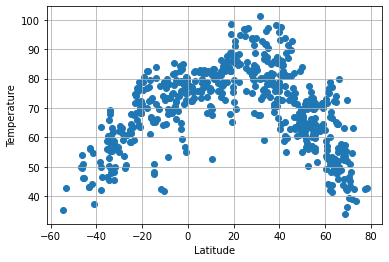

In [14]:
x_values = city_df['Lat']
y_values = city_df['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

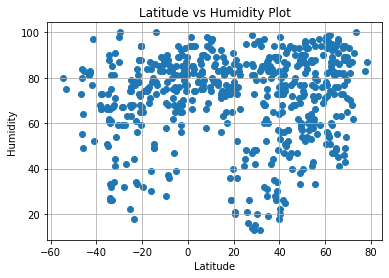

In [17]:
#Build a scatter plot for Latitude vs Humidity
plt.scatter(city_df["Lat"],city_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Humidity Plot")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/LatitideandHumidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

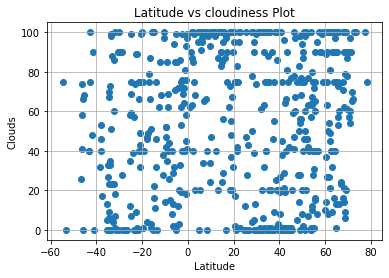

In [19]:
#Build a scatter plot for Latitude vs cloudiness plot
plt.scatter(city_df["Lat"], city_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs cloudiness Plot")
plt.ylabel("Clouds")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/LatitideandHumidity.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

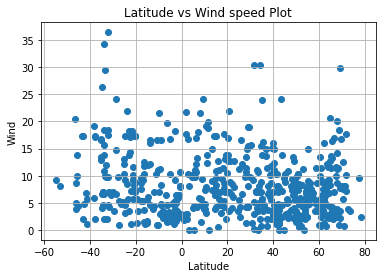

In [20]:
#Build a scatter plot for Latitude vs Wind speed plot
plt.scatter(city_df["Lat"], city_df["Windspeed"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Wind speed Plot")
plt.ylabel("Wind")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/LatitideandWind.png")

# Show plot
plt.show()

## Linear Regression

In [21]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      69.316835
1      69.723496
2      69.361553
3      69.289467
4      69.250733
         ...    
553    69.466198
554    69.499435
555    69.352403
556    69.533738
557    69.281043
Name: Lat, Length: 558, dtype: float64


In [22]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.0x +69.52


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression